### Image Processing for detecting Cracks in Concrete for (Site Engineers)

### Coded By/Mohammed AGooR

---------

### Import Used Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score

import tensorflow as tf

### Get Positive & Negative Directories

In [2]:
positive_dir = Path(r'C:\Users\moham\Desktop\Image\DataSets\Positive')
negative_dir = Path(r'C:\Users\moham\Desktop\Image\DataSets\Negative')

### Creating DataFrames

In [3]:
def generate_df(img_dir, label):
    
    file_paths = pd.Series(list(img_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=file_paths.index)
    df = pd.concat([file_paths, labels], axis=1)
    
    return df

In [4]:
positive_df = generate_df(positive_dir, 'POSITIVE')
negative_df = generate_df(negative_dir, 'NEGATIVE')

# concatenate both positive and negative df
all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1, random_state=1).reset_index(drop=True)
all_df

Filepath     Label
0      C:\Users\moham\Desktop\Image\DataSets\Positive...  POSITIVE
1      C:\Users\moham\Desktop\Image\DataSets\Positive...  POSITIVE
2      C:\Users\moham\Desktop\Image\DataSets\Positive...  POSITIVE
3      C:\Users\moham\Desktop\Image\DataSets\Negative...  NEGATIVE
4      C:\Users\moham\Desktop\Image\DataSets\Positive...  POSITIVE
...                                                  ...       ...
39995  C:\Users\moham\Desktop\Image\DataSets\Positive...  POSITIVE
39996  C:\Users\moham\Desktop\Image\DataSets\Negative...  NEGATIVE
39997  C:\Users\moham\Desktop\Image\DataSets\Positive...  POSITIVE
39998  C:\Users\moham\Desktop\Image\DataSets\Positive...  POSITIVE
39999  C:\Users\moham\Desktop\Image\DataSets\Negative...  NEGATIVE

[40000 rows x 2 columns]

### Split the DataSet

In [5]:
train_df, test_df = train_test_split(all_df.sample(6000, random_state=1), 
                train_size=0.7,
                shuffle=True,
                random_state=1)

### Loading Image Data

In [6]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                           validation_split=0.2)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
train_data = train_gen.flow_from_dataframe(train_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          subset='training')


val_data = train_gen.flow_from_dataframe(train_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          subset='validation')


test_data = test_gen.flow_from_dataframe(test_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=False,
                                          seed=42)

Found 3360 validated image filenames belonging to 2 classes.
Found 840 validated image filenames belonging to 2 classes.
Found 1800 validated image filenames belonging to 2 classes.


In [8]:
test_data

### Training DataSet

In [9]:
inputs = tf.keras.Input(shape=(120,120,3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [10]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
# print model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 118, 118, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33    

In [13]:
history = model.fit(train_data, validation_data=val_data, epochs=100, 
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=3,
                                                              restore_best_weights=True)
                             ])

Epoch 1/100
105/105 [==============================] - 17s 158ms/step - loss: 0.6726 - accuracy: 0.5961 - val_loss: 0.6473 - val_accuracy: 0.6262
Epoch 2/100
105/105 [==============================] - 15s 147ms/step - loss: 0.5963 - accuracy: 0.7196 - val_loss: 0.5570 - val_accuracy: 0.8714
Epoch 3/100
105/105 [==============================] - 15s 145ms/step - loss: 0.5002 - accuracy: 0.8420 - val_loss: 0.4572 - val_accuracy: 0.8738
Epoch 4/100
105/105 [==============================] - 16s 149ms/step - loss: 0.3940 - accuracy: 0.8994 - val_loss: 0.3591 - val_accuracy: 0.9310
Epoch 5/100
105/105 [==============================] - 17s 162ms/step - loss: 0.3085 - accuracy: 0.9280 - val_loss: 0.2629 - val_accuracy: 0.9357
Epoch 6/100
105/105 [==============================] - 19s 179ms/step - loss: 0.2649 - accuracy: 0.9366 - val_loss: 0.2135 - val_accuracy: 0.9476
Epoch 7/100
105/105 [==============================] - 18s 169ms/step - loss: 0.2126 - accuracy: 0.9452 - val_loss: 0.2153 -

### Plotting

In [14]:
fig = px.line(history.history,
             y=['loss', 'val_loss'],
             labels={'index':'Epoch'},
             title='Training and Validation Loss over Time')

fig.show()

### Final Results

In [45]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    accuracy = results[1]
    
    print(f'Test Loss {loss:.5f}')
    print(f'Test Accuracy {accuracy * 100:.2f} %')
    
    
    # predicted y values
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    y_certain = np.squeeze((model.predict(test_data)).astype(np.int))
    
    conf_matr = confusion_matrix(test_data.labels, y_pred)
    
    class_report = classification_report(test_data.labels, y_pred,
                                         target_names=['NEGATIVE', 'POSITIVE'])
    
    plt.figure(figsize=(6,6))
    
    sns.heatmap(conf_matr, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    
    plt.xticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('r2 Score : ', r2_score(test_data.labels, y_pred))
    print()
    print('Classification Report :\n......................\n', class_report)

Test Loss 0.06888
Test Accuracy 97.61 %


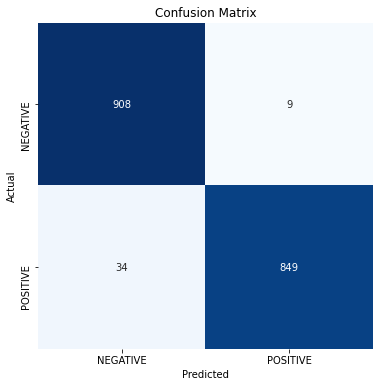

r2 Score :  0.9044103389974942

Classification Report :
......................
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.99      0.98       917
    POSITIVE       0.99      0.96      0.98       883

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



In [46]:
evaluate_model(model, test_data)

### Testing New DataSet

In [64]:
def test_new_data(dir_path):
    
    new_test_dir = Path(dir_path)
    
    df_new = generate_df(new_test_dir, 'Testing')
    
    test_data_new = test_gen.flow_from_dataframe(df_new, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          batch_size=5,
                                          shuffle=False,
                                          seed=42)
    
        # predicted y values
    y_pred = np.squeeze((model.predict(test_data_new) >= 0.5).astype(np.int))
    
    
    y_certain = model.predict(test_data_new).round(6)
    y_out = []
    for i in y_pred:
        if i==0:
            y_out.append('Negative (Not Crack)')
        else:
            y_out.append('Positive(Crack) ')
            
    result = pd.DataFrame(np.c_[y_out, y_certain], columns=['Result', 'Confidance of being Cracked'])
    
    return result

In [73]:
results = test_new_data(r'C:\Users\moham\Desktop\new\check')

Found 96 validated image filenames belonging to 1 classes.


In [74]:
results.to_csv('final_results.csv')